# Обучение с учителем. Классификация
## Предсказание оттока клиентов банка
 

## Суворов Роман ИВТ 2.1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

%matplotlib inline
sns.set_style('darkgrid')

### Описание задачи

Датасет содержит информацию о клиентах межнационального банка. Задача состоит в построении модели машинного обучения, которая будет предсказывать, уйдёт ли клиент из банка (отток) или останется лояльным. Это позволит банку разработать кампанию по удержанию клиентов, своевременно выявляя тех, кто склонен к уходу.

Целевой признак — Exited (1 — клиент ушёл, 0 — клиент остался).

### Знакомство с данными и их исследование

In [2]:

data = pd.read_csv('churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Признаки:
* RowNumber — номер строки таблицы;
* CustomerId — идентификатор клиента;
* Surname — фамилия клиента;
* CreditScore — кредитный рейтинг клиента;
* Geography — страна проживания клиента;
* Gender — пол клиента;
* Age — возраст клиента;
* Tenure — сколько лет клиент пользуется банком;
* Balance — баланс на счетах клиента;
* NumOfProducts — количество услуг банка, которыми пользуется клиент;
* HasCrCard — наличие кредитной карты (1 — да, 0 — нет);
* IsActiveMember — активность клиента (1 — активный, 0 — неактивный);
* EstimatedSalary — предполагаемая зарплата клиента;
* Exited — статус клиента (1 — ушёл, 0 — остался, целевой признак).

In [3]:

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:

data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


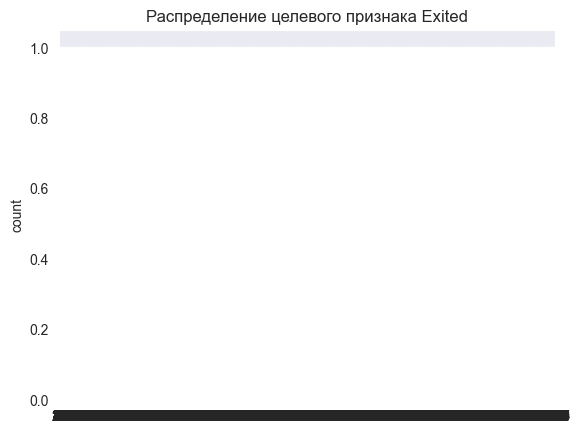

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [6]:

sns.countplot(data['Exited'])
plt.title('Распределение целевого признака Exited')
plt.show()
print(data['Exited'].value_counts(normalize=True))

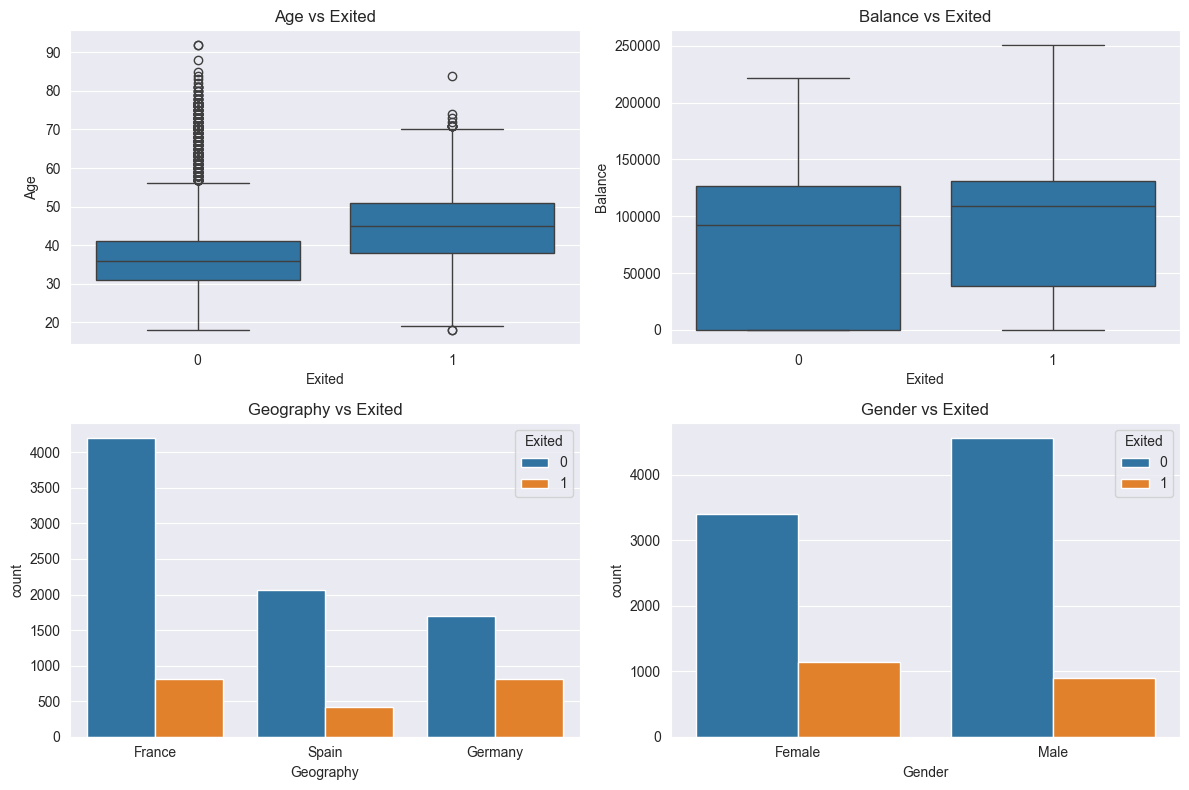

In [7]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.boxplot(x='Exited', y='Age', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Exited')

sns.boxplot(x='Exited', y='Balance', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Balance vs Exited')

sns.countplot(x='Geography', hue='Exited', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Geography vs Exited')

sns.countplot(x='Gender', hue='Exited', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Gender vs Exited')

plt.tight_layout()
plt.show()

### Предобработка данных

1. Удалим неинформативные признаки (RowNumber, CustomerId, Surname).
2. Закодируем категориальные признаки (Geography, Gender) с помощью one-hot encoding.
3. Масштабируем числовые признаки.
4. Разделим данные на обучающую и тестовую выборки.

In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = preprocessing.StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (8000, 11)
Test shape: (2000, 11)


### Логистическая регрессия

In [9]:
log_reg = linear_model.LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

y_test_proba = log_reg.predict_proba(X_test)[:, 1]

/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_mo

### Оценка качества модели

In [10]:

print('Метрики на обучающей выборке:')
print(metrics.classification_report(y_train, y_train_pred))

print('Метрики на тестовой выборке:')
print(metrics.classification_report(y_test, y_test_pred))

Метрики на обучающей выборке:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6370
           1       0.60      0.21      0.32      1630

    accuracy                           0.81      8000
   macro avg       0.71      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000

Метрики на тестовой выборке:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



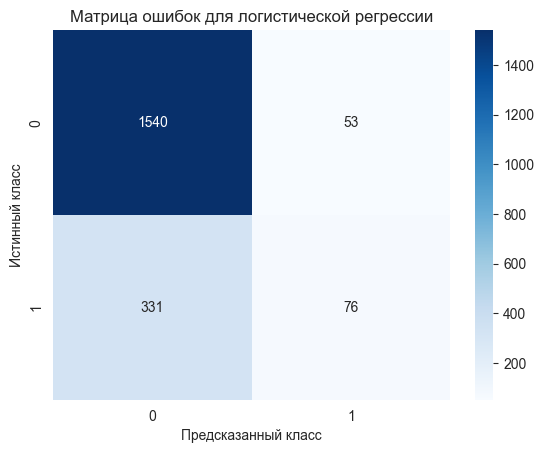

In [11]:

cm = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок для логистической регрессии')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

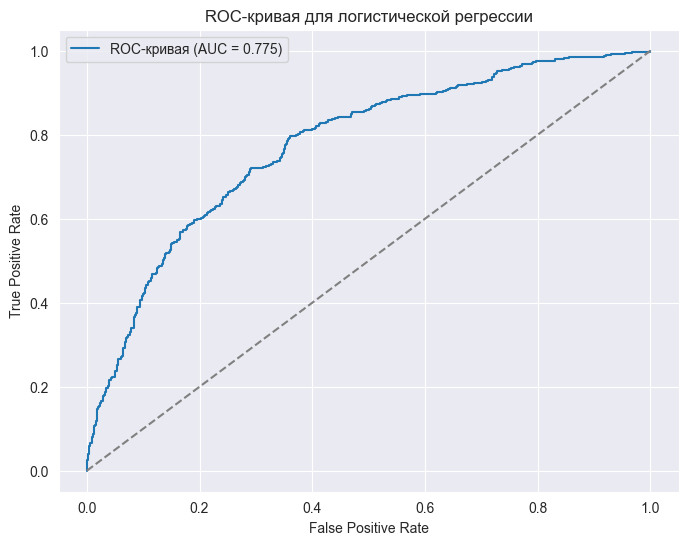

ROC-AUC: 0.775


In [12]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
roc_auc = metrics.roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC-кривая для логистической регрессии')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print(f'ROC-AUC: {roc_auc:.3f}')

### Анализ полученных результатов  

1. **Оценка модели**: Логистическая регрессия показывает среднюю эффективность. Высокий показатель Accuracy связан с дисбалансом классов (примерно 80% клиентов остаются лояльными). При этом низкий Recall для класса ушедших клиентов (1) говорит о том, что модель плохо распознает клиентов, склонных к уходу.  

2. **Матрица ошибок**: Значительное число ложноотрицательных прогнозов (FN) свидетельствует о том, что модель пропускает многих потенциально уходящих клиентов, что негативно сказывается на решении задачи их удержания.  

3. **ROC-AUC**: Значение ROC-AUC в пределах 0.7–0.8 указывает на способность модели различать классы, однако её предсказательная сила далека от оптимальной.  

4. **Пути улучшения**:  
   - Применение методов устранения дисбаланса классов (например, oversampling с SMOTE или взвешивание классов).  
   - Дополнительный отбор или генерация новых признаков (feature engineering), включая создание комбинированных признаков.  
   - Тестирование более сложных алгоритмов (например, случайный лес или градиентный бустинг) в дальнейших экспериментах.  
   - Оптимизация гиперпараметров логистической регрессии (например, настройка параметра C).  

